In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = fetch_openml('mnist_784', version=1)#Get data from https://www.openml.org/d/554
dfData = pd.DataFrame(np.c_[data["data"],data["target"]],columns = data["feature_names"]+["target"])
stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

for train_index, test_index in stratSplit.split(dfData[data["feature_names"]], dfData["target"]):
    X_train = dfData[data["feature_names"]].iloc[train_index]
    X_test = dfData[data["feature_names"]].iloc[test_index]
    
    y_train = dfData["target"].iloc[train_index]
    y_test = dfData["target"].iloc[test_index]

In [2]:
ks = []
inertia = []
for k in range(1,101,5):
    print(k)
    km = KMeans(n_clusters=k)
    km.fit(X_train)
    inertia.append(km.inertia_)
    ks.append(k)

1
6
11
16
21
26
31
36
41
46
51
56
61
66
71
76
81
86
91
96


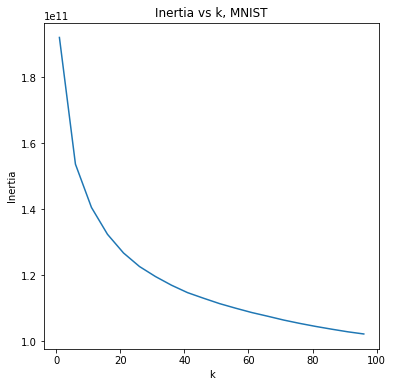

In [3]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
plt.plot(ks,inertia)
plt.title('Inertia vs k, MNIST')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()